In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [2]:
mydata = pd.read_csv("/Users/amitmishra/Desktop/Orlando City SC docs/oura_2019_trends.csv")

In [3]:
mydata.isna().sum()

date                0
average_rhr        59
sleep_score        59
activity_score      4
readiness_score    33
dtype: int64

In [4]:
mydata['average_rhr'].fillna(mydata['average_rhr'].mean(), inplace=True)
mydata['sleep_score'].fillna(mydata['sleep_score'].mean(), inplace=True)
mydata['activity_score'].fillna(mydata['activity_score'].mean(), inplace=True)
mydata['readiness_score'].fillna(mydata['readiness_score'].mean(), inplace=True)

In [5]:
mydata.head(2)

,date,average_rhr,sleep_score,activity_score,readiness_score
0,2018-12-17,60.153631,78.0,93.0,78.194757
1,2018-12-18,59.750000,84.0,99.0,93.000000


In [8]:
mydata.isna().sum()

average_rhr        0
sleep_score        0
activity_score     0
readiness_score    0
dtype: int64

In [6]:
mydata.drop("date", axis = 1, inplace=True)

In [9]:
mydata.describe()

,average_rhr,sleep_score,activity_score,readiness_score
count,300.000000,300.000000,300.000000,300.000000
mean,60.153631,78.000000,91.199324,78.194757
std,7.210023,8.418406,7.647598,10.961757
min,45.750000,46.000000,54.000000,36.000000
25%,55.375000,75.000000,89.000000,72.000000
50%,60.153631,78.000000,93.000000,78.597378
75%,63.156250,83.000000,97.000000,86.250000
max,88.970000,98.000000,100.000000,96.000000


average_rhr:
Mean: 60.15, Standard Deviation: 7.21
Distribution: The average resting heart rate (RHR) ranges from 45.75 to 88.97.
Variability: The standard deviation indicates moderate variability in RHR.

sleep_score:
Mean: 78.00, Standard Deviation: 8.42
Distribution: Sleep scores range from 46 to 98.
Variability: The standard deviation suggests a moderate spread in sleep scores.

activity_score:
Mean: 91.20, Standard Deviation: 7.65
Distribution: Activity scores range from 54 to 100.
Variability: The standard deviation indicates moderate variability in activity scores.

readiness_score:
Mean: 78.19, Standard Deviation: 10.96
Distribution: Readiness scores range from 36 to 96.
Variability: The standard deviation suggests a relatively higher variability in readiness scores.

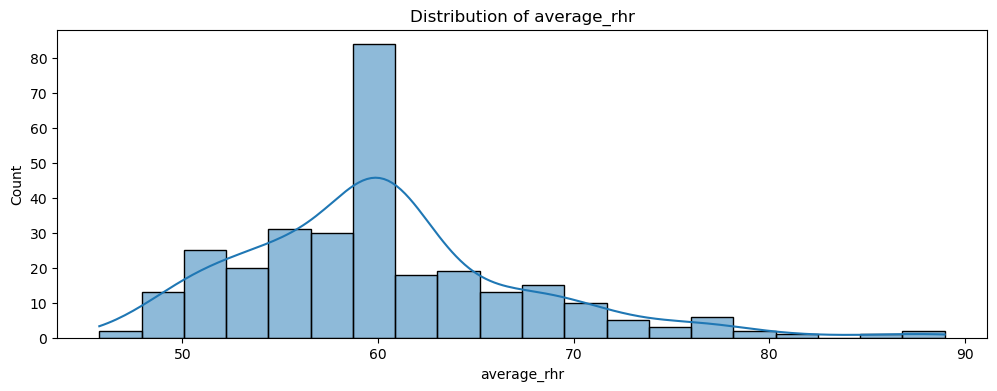

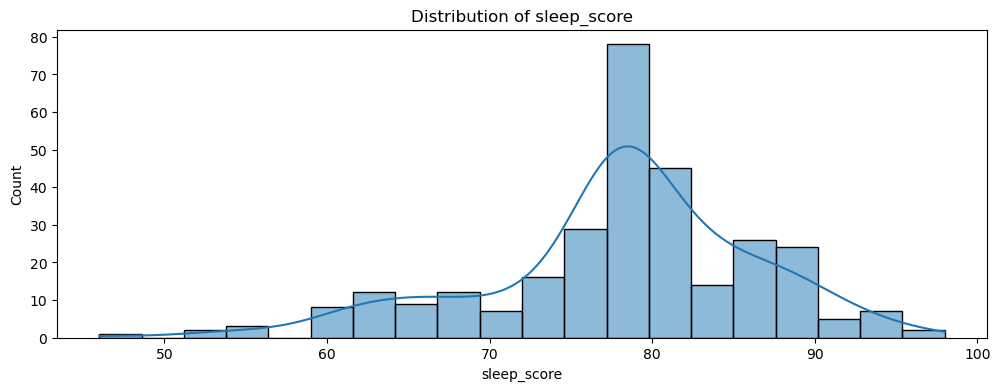

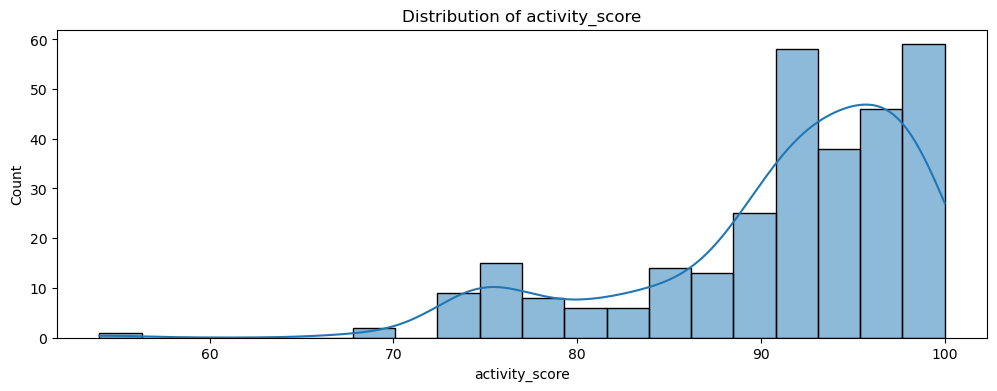

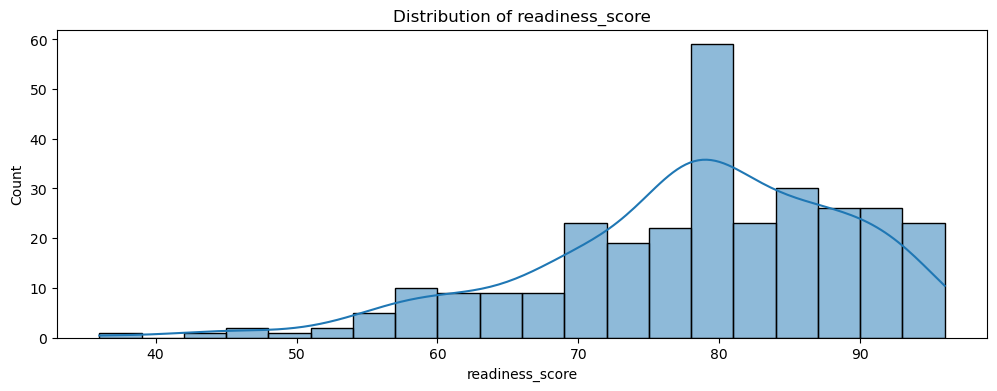

In [45]:
# Plot 1: Distribution of average_rhr
plt.figure(figsize=(12, 4))
sns.histplot(mydata['average_rhr'], bins=20, kde=True)
plt.title('Distribution of average_rhr')
plt.show()

# Plot 2: Distribution of sleep_score
plt.figure(figsize=(12, 4))
sns.histplot(mydata['sleep_score'], bins=20, kde=True)
plt.title('Distribution of sleep_score')
plt.show()

# Plot 3: Distribution of activity_score
plt.figure(figsize=(12, 4))
sns.histplot(mydata['activity_score'], bins=20, kde=True)
plt.title('Distribution of activity_score')
plt.show()

# Plot 4: Distribution of readiness_score
plt.figure(figsize=(12, 4))
sns.histplot(mydata['readiness_score'], bins=20, kde=True)
plt.title('Distribution of readiness_score')
plt.show()


In [10]:
mydata = pd.DataFrame(mydata)

In [11]:
#We split the features in X and y for ridge regression

In [12]:
X = mydata[["average_rhr","sleep_score","activity_score"]]
y = mydata["readiness_score"]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 3)

In [33]:
scores = []

In [34]:
for alpha_score in [0.1,1.0, 10.0, 100.0,1000.0,10000.0]:
    model_ridge = Ridge(alpha = alpha_score)
    model_ridge.fit(X,y)
    y_predicted = model_ridge.predict(X_test)
    scores.append(model_ridge.score(X_test,y_test))
print("The r-squared values are: {}".format(scores))

The r-squared values are: [0.5821276831968423, 0.5821301482858146, 0.5821546645779472, 0.5823865199229319, 0.5835117483529826, 0.542276359894208]


#Choose the alpha with the optimum r-squared value: 0.5835117483529826

In [35]:
ridge_reg = Ridge(alpha = 1000.0)

In [36]:
ridge_reg.fit(X,y)

Ridge(alpha=1000.0)

In [37]:
y_pred = ridge_reg.predict(X_test)

In [38]:
mse_ridge = mean_squared_error(y_test, y_pred)

In [39]:
rmse_ridge = mse_ridge**(1/2)

In [40]:
print(f'Mean Squared Error: {mse_ridge}')
print("Root mean squared error:{}". format(rmse_ridge))

Mean Squared Error: 43.04687834952378
Root mean squared error:6.56101199126505


#Predicting the readiness score:

In [31]:
#Order by: 'average_rhr', 'sleep_score', 'activity_score'

new_values = np.array([[60, 90, 80]])
predicted_readiness = ridge_reg.predict(new_values)
print('Predicted Readiness Score:', predicted_readiness[0])

Predicted Readiness Score: 84.403511486732


/Users/amitmishra/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
